In [1]:
import sys, os
sys.path.append('..'); os.chdir('..')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [24]:
label_map = {
    'ccc_v': 'Valence CCC',
    'ccc_a': 'Arousal CCC',
    'rmse_v': 'Valence RMSE',
    'rmse_a': 'Arousal RMSE',
    'mae_v': 'Valence MAE',
    'mae_a': 'Arousal MAE',
    'expr_acc': 'Expression Accuracy',
}

In [4]:
# plot subplots
df = pd.read_csv("data/emodataset/evaluations.csv")
df

,model,ccc_v,ccc_a,rmse_v,rmse_a,mae_v,mae_a,ccc_mean,expr_acc,expr_acc_neutral,expr_acc_happy,expr_acc_sad,expr_acc_surprise,expr_acc_fear,expr_acc_disgust,expr_acc_anger,expr_acc_contempt,description
0,emonet_8.pth,0.5242,0.1619,0.5388,0.4155,0.4266,0.3340,0.3430,0.5839,0.7079,0.4803,0.5978,0.6548,0.7483,0.5747,0.6628,0.4497,Pretrained (8 classes)
1,emonet_8_FT_16ep.pth,0.7707,0.3234,0.4490,0.3356,0.3218,0.2808,0.5470,0.7335,0.3596,0.9542,0.6891,0.6864,0.7265,0.6738,0.7229,0.5645,Fine-tuned (16 epochs)
2,emonet_8_FT_20ep_mse.pth,0.7271,0.2772,0.4764,0.3596,0.3306,0.2978,0.5021,0.6970,0.3970,0.8331,0.6783,0.6258,0.7466,0.6006,0.7429,0.6274,Fine-tuned (20 epochs MSE)
3,emonet_8_FT_20ep_hubert.pth,0.7271,0.2772,0.4764,0.3596,0.3306,0.2978,0.5021,0.6970,0.3970,0.8331,0.6783,0.6258,0.7466,0.6006,0.7429,0.6274,Fine-tuned (20 epochs Hubert)


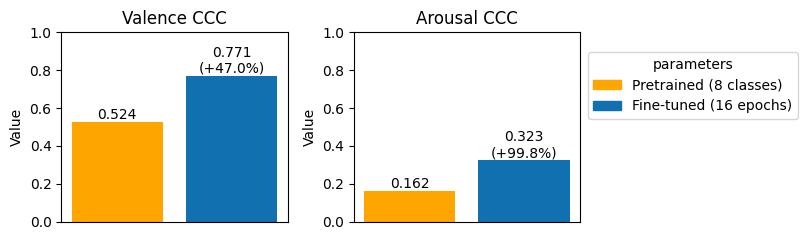

In [41]:
# PLOT: evaluations percent diff
INCLUDE_MODELS = [
    "emonet_8.pth",
    "emonet_8_FT_16ep.pth",
    # "emonet_8_FT_5ep_mod.pth",
    # "emonet_8_FT_20ep_mse.pth",
    # "emonet_8_FT_20ep_hubert.pth",
]
df_plot = df[df["model"].isin(INCLUDE_MODELS)]

metrics = ['ccc_v','ccc_a']
colors = ["orange", "#1070b0", "blue", "cyan", "red"]

models = df_plot['model'].tolist()
descriptions = df_plot['description'].tolist()
x = np.arange(len(models))

# plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))
# plt.suptitle('Fine-tuning EmoNet on Emodataset', fontsize=18)
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    values = df_plot[metric].tolist()
    bars = ax.bar(range(len(values)), values, color=colors)
    ax.set_title(label_map[metric])
    ax.set_xticks([])
    ax.set_ylim(0, 1)
    ax.set_xticklabels([])  # remove x-axis labels
    ax.set_ylabel('Value')

    # display value above bar
    base_value = None
    for bar, value in zip(bars, values):
        perc_str = ""
        if base_value is None:
            base_value = value
        else:
            perc = (value - base_value) / base_value
            perc_str = f"\n({perc*100:+.1f}%)"
        ax.text(bar.get_x() + bar.get_width()/2, value,
                f'{value:.3f}{perc_str}', ha='center', va='bottom')

# axes[-1].axis('off')

handles = [ mpatches.Patch(color=color, label=desc) for color, desc in zip(colors, descriptions) ]
fig.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.35, 0.8), title='parameters')
plt.tight_layout()
plt.show()

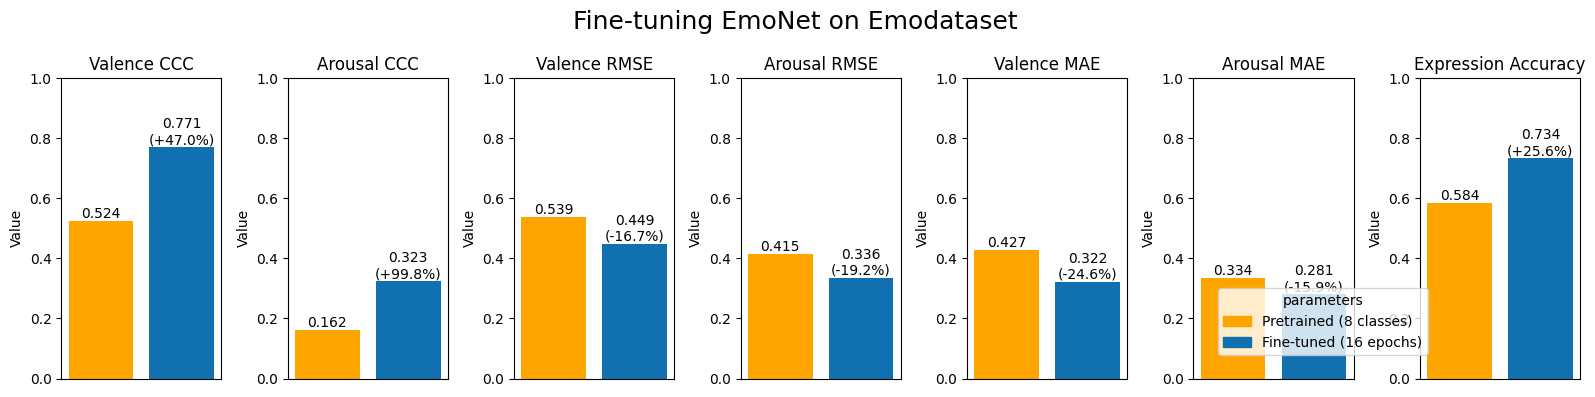

In [ ]:
# PLOT: evaluations percent diff
INCLUDE_MODELS = [
    "emonet_8.pth",
    "emonet_8_FT_16ep.pth",
    # "emonet_8_FT_5ep_mod.pth",
    # "emonet_8_FT_20ep_mse.pth",
    # "emonet_8_FT_20ep_hubert.pth",
]
df_plot = df[df["model"].isin(INCLUDE_MODELS)]

metrics = ['ccc_v','ccc_a','rmse_v','rmse_a','mae_v','mae_a','expr_acc']
colors = ["orange", "#1070b0", "blue", "cyan", "red"]

models = df_plot['model'].tolist()
descriptions = df_plot['description'].tolist()
x = np.arange(len(models))

# plot
fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(16, 4))
plt.suptitle('Fine-tuning EmoNet on Emodataset', fontsize=18)
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    values = df_plot[metric].tolist()
    bars = ax.bar(range(len(values)), values, color=colors)
    ax.set_title(label_map[metric])
    ax.set_xticks([])
    ax.set_ylim(0, 1)
    ax.set_xticklabels([])  # remove x-axis labels
    ax.set_ylabel('Value')

    # display value above bar
    base_value = None
    for bar, value in zip(bars, values):
        perc_str = ""
        if base_value is None:
            base_value = value
        else:
            perc = (value - base_value) / base_value
            perc_str = f"\n({perc*100:+.1f}%)"
        ax.text(bar.get_x() + bar.get_width()/2, value,
                f'{value:.3f}{perc_str}', ha='center', va='bottom')

# axes[-1].axis('off')

handles = [ mpatches.Patch(color=color, label=desc) for color, desc in zip(colors, descriptions) ]
# fig.legend(handles=handles, loc='lower right', bbox_to_anchor=(0.9, 0.1), title='parameters')
plt.tight_layout()
plt.show()

In [14]:
metrics = list(df.columns[-9:-1])

model_a = "emonet_8.pth"
model_b = "emonet_8_FT_16ep.pth"

row_a = df[df['model'] == model_a]
row_b = df[df['model'] == model_b]

data_emonet = np.array([ row_a[x] for x in metrics ]).flatten()
data_ft = np.array([ row_b[x] for x in metrics ]).flatten()

xlabels = np.array([ x[9:] for x in metrics ])
xticks = np.array(range(len(xlabels)))

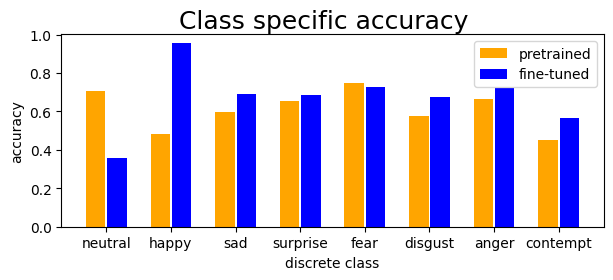

In [22]:
# PLOT: class specific accuracy

fig, ax = plt.subplots(figsize=(7, 2.5))


plt.suptitle('Class specific accuracy', fontsize=18)

wid=0.3

# plot emonet data
bars = ax.bar(xticks-wid*0.55, data_emonet, width=wid, label='pretrained', color='orange')
# for bar, value in zip(bars, data_emonet):
#     ax.text(bar.get_x() + bar.get_width()/2, value,
#             f'{value:.3f}', ha='center', va='bottom')

# plot fine-tuned data
bars = ax.bar(xticks+wid*0.55, data_ft, width=wid, label='fine-tuned', color='blue')
# for bar, value in zip(bars, data_ft):
#     perc = (value - base_value) / base_value
#     perc_str = f"\n({int(perc*100)}%)"
#     ax.text(bar.get_x() + bar.get_width()/2, value,
#             f'{value:.3f}{perc_str}', ha='center', va='bottom')

ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)

ax.set_ylabel('accuracy')
ax.set_xlabel('discrete class')

ax.legend()

# plt.tight_layout()
plt.show()

In [ ]:
# PLOT (old): percentage increase not included
INCLUDE_MODELS = [
    "emonet_8.pth",
    "emonet_8_FT_16ep.pth",
    "emonet_8_finetuned.pth",
]
df_plot = df[df["model"].isin(INCLUDE_MODELS)]

metrics = ['ccc_v','ccc_a','rmse_v','rmse_a','expr_acc']

models = df_plot['model'].tolist()
descriptions = df_plot['description'].tolist()
x = np.arange(len(models))

colors = ["grey", "orange", "#1070b0", "blue", "cyan", "red"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    values = df_plot[metric].tolist()
    bars = ax.bar(x, values, color=colors)
    ax.set_title(label_map[metric])
    ax.set_xticks(x)
    ax.set_ylim(0, 1)
    ax.set_xticklabels([])  # remove x-axis labels
    ax.set_ylabel('Value')

    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, value,
                f'{value:.3f}', ha='center', va='bottom')

plt.suptitle('Fine-tuning EmoNet on Emodataset', fontsize=18)
axes[-1].axis('off')

handles = [ mpatches.Patch(color=color, label=desc) for color, desc in zip(colors, descriptions) ]
fig.legend(handles=handles, loc='lower right', bbox_to_anchor=(0.9, 0.1), title='parameters')
plt.tight_layout()
plt.show()